In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Bar Charts
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

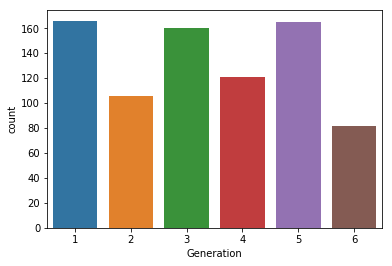

In [3]:
sns.countplot(data=pokemon, x = 'Generation')

color_palette returns a list of RGB tuples, each tuple specifying a color. No parameters returns the current / default palette, and we take the first one to be the color for all bars.

In [4]:
base_color = sns.color_palette()[0]

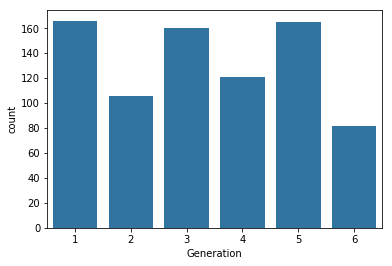

In [5]:
sns.countplot(data=pokemon, x = 'Generation', color=base_color)

In [6]:
gen_order = pokemon['Generation'].value_counts().index

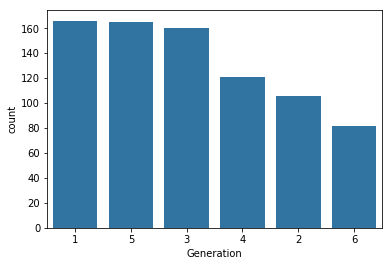

In [7]:
sns.countplot(data=pokemon, x = 'Generation', color=base_color, order = gen_order)

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.]),
 <a list of 7 Text xticklabel objects>)

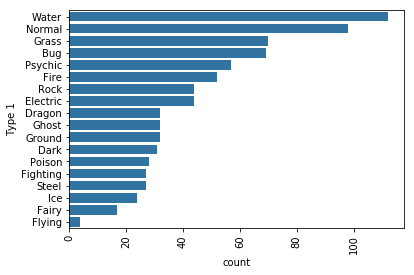

In [8]:
type_1_order = pokemon['Type 1'].value_counts().index
sns.countplot(data=pokemon, y = 'Type 1', color=base_color, order=type_1_order)
plt.xticks(rotation = 90)

Alternatively, you can use matplotlib's xticks function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

## Absolute vs. Relative Frequency
By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [9]:
pkmn_types = pokemon.melt(id_vars = ['#', 'Name'],
                         value_vars = ['Type 1', 'Type 2'],
                         var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[1:10]

,#,Name,type_level,type
1,2,Ivysaur,Type 1,Grass
2,3,Venusaur,Type 1,Grass
3,3,VenusaurMega Venusaur,Type 1,Grass
4,4,Charmander,Type 1,Fire
5,5,Charmeleon,Type 1,Fire
6,6,Charizard,Type 1,Fire
7,6,CharizardMega Charizard X,Type 1,Fire
8,6,CharizardMega Charizard Y,Type 1,Fire
9,7,Squirtle,Type 1,Water


In [10]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.

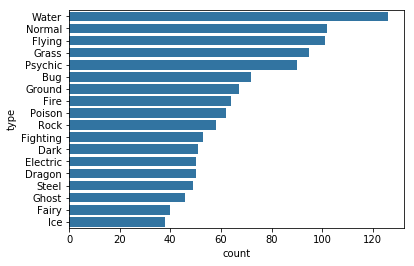

In [11]:
sns.countplot(data = pkmn_types, y='type', color=base_color, order=type_order)

In [12]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1575


In [13]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

Text(0.5,0,'Proportion')

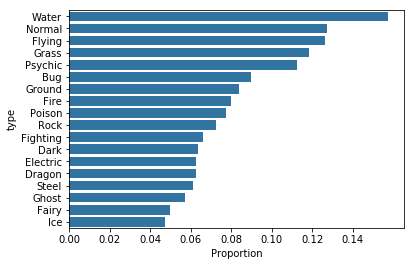

In [14]:
sns.countplot(data = pkmn_types, y='type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion')

Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

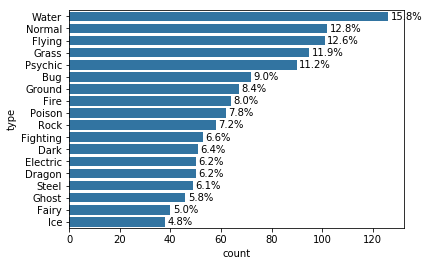

In [15]:
sns.countplot(data = pkmn_types, y='type', color=base_color, order=type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

## Counting Missing Data

One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

    df.isna().sum()

What if we want to visualize these missing value counts? We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here

    na_counts = df.isna().sum()
    base_color = sb.color_palette()[0]
    sb.barplot(na_counts.index.values, na_counts, color = base_color)

## Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

(array([  0.,   2.,   3.,   9.,  21.,  17.,  44.,  31.,  49.,  41.,  54.,
         49.,  54.,  52.,  52.,  26.,  44.,  35.,  41.,  39.,  44.,  23.,
         22.,  14.,   9.,   6.,   6.,   2.,   2.,   3.,   4.,   0.,   1.,
          0.,   0.,   1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180], dtype=int64),
 <a list of 36 Patch objects>)

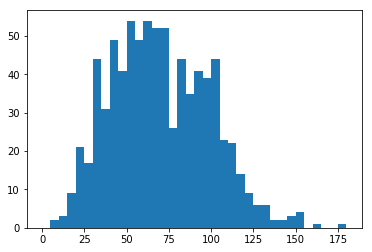

In [22]:
bins = np.arange(0, pokemon['Speed'].max()+5, 5)
plt.hist(data=pokemon, x ='Speed', bins=bins)

You can see that there are eight data points that fall in the range between about 0 and 2.5 in the leftmost bin, and nine points in the range from about 2.5 to 5 in the adjacent bin. Overall, a generally bimodal distribution is observed. The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret. Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function:

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot. The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots.

## Alternative Approach
The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

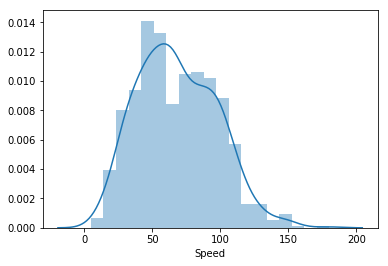

In [23]:
sns.distplot(pokemon['Speed'])

Note that the first argument must be the Series or array with the points to be plotted, rather than being able to specify a data source and column.

The distplot function has built-in rules for specifying histogram bins, and by default plots a kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default distplot bin size might be better than the fixed 10 of .hist, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

The result of the code above is exactly like the histogram above with bin width of 1. The units of the vertical axis are also back in terms of counts.

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional bits offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.

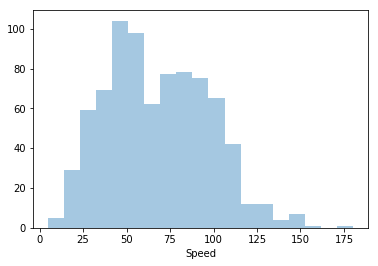

In [24]:
sns.distplot(pokemon['Speed'], kde=False)

## Descriptive Statistics, Outliers, and Axis Limits
As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the left and right bounds of the region to plot. Alternatively, the xlim function can be called with two numeric arguments to the same result.

(25, 100)

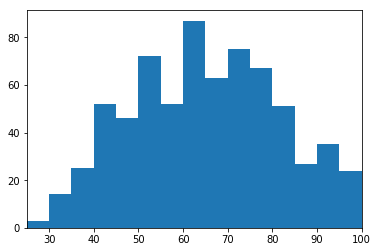

In [31]:
bins = np.arange(0, pokemon['HP'].max()+5, 5)
plt.hist(data = pokemon, x = 'HP', bins=bins)
plt.xlim(25, 100)

## Scales and Transformations
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. Take the logarithm of those values, however, and the data looks normally distributed.

([<matplotlib.axis.XTick at 0x1f206af2630>,
 <a list of 5 Text xticklabel objects>)

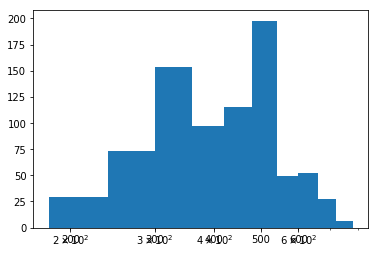

In [50]:
bins = 10 ** np.arange(2, 3, .1)
ticks = [200, 300, 400, 500, 600]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'Total')
plt.xscale('log')
plt.xticks(ticks, labels)

In [43]:
np.log10(pokemon['Total'].describe())

count    2.903090
mean     2.638592
std      2.079047
min      2.255273
25%      2.518514
50%      2.653213
75%      2.711807
max      2.892095
Name: Total, dtype: float64

In the left plot, the high-value points above 1000 mash most of the points into the bins on the far left. With the right plot, the logarithmic transform makes those points look in line with the rest, with the data looking unimodal overall. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's xscale function includes a few built-in transformations: we'll use the 'log' scale here.

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use xticks to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

It is important that the xticks are specified after xscale since that function has its own built-in tick settings.



We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.